# Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data import
orders = pd.read_csv("data/olist_orders_dataset.csv")
order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
cat_map = pd.read_csv("data/product_category_name_translation.csv")

# Data preparation 

In [3]:
# Check the data type of all columns in orders df
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# change types to datetime and category

def clean_dataframe(df, datetime_keywords=None, category_cols=None):
    df = df.copy()
    
    if datetime_keywords is None:
        datetime_keywords = ["date", "time", "timestamp", "approved"]
    if category_cols is None:
        category_cols = []
    
    for col in df.columns:
        if any(kw in col.lower() for kw in datetime_keywords):
            df[col] = pd.to_datetime(df[col], errors="coerce")
    
    for col in category_cols:
        if col in df.columns:
            df[col] = df[col].astype("category")
    
    return df

In [6]:
orders = clean_dataframe(orders, category_cols=["order_status"])
orders.dtypes # checking new types

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [7]:
# Check the data type of all columns in order_reviews df
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
order_reviews = clean_dataframe(order_reviews)
order_reviews.dtypes # checking new types

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [10]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [12]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [14]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [16]:
order_items_new = clean_dataframe(order_items)
order_items_new.dtypes # checking new types

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [17]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [19]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [21]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [22]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

# Missing Values Detecting

In [23]:
# Check the number of duplicates row
orders.duplicated().sum()

0

In [24]:
order_reviews.duplicated().sum()

0

In [25]:
order_payments.duplicated().sum()

0

In [26]:
customers.duplicated().sum()

0

In [27]:
order_items.duplicated().sum()

0

In [28]:
products.duplicated().sum()

0

In [29]:
sellers.duplicated().sum()

0

In [30]:
geolocation.duplicated().sum()

261831

In [31]:
dupes = geolocation[geolocation.duplicated(keep=False)]
dupes.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP


In [32]:
# Remove exact duplicate rows from geolocation dataset
geolocation_clean = geolocation.drop_duplicates()
geolocation_clean.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [33]:
geolocation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [34]:
# Uniqueness checks
orders["order_id"].is_unique
products["product_id"].is_unique
sellers["seller_id"].is_unique

True

In [35]:
# Missingness report
def missing_report(dfs: dict, show_only_missing=True, sort_by=("missing_pct", "desc")):
    """
    Build a tidy missing-values report across multiple DataFrames.

    Parameters
    ----------
    dfs : dict
        Mapping like {"orders": orders_df, "customers": customers_df, ...}
    show_only_missing : bool
        If True, keep only columns with at least one missing value.
    sort_by : tuple
        ("missing_pct" | "missing_count" | "table" | "column", "asc"|"desc")

    Returns
    -------
    pd.DataFrame with columns:
        table, column, dtype, n_rows, missing_count, missing_pct, n_unique
    """
    rows = []
    for name, df in dfs.items():
        n = len(df)
        miss_cnt = df.isnull().sum()
        for col in df.columns:
            cnt = int(miss_cnt[col])
            if (not show_only_missing) or (cnt > 0):
                rows.append({
                    "table": name,
                    "column": col,
                    "dtype": str(df[col].dtype),
                    "n_rows": n,
                    "missing_count": cnt,
                    "missing_pct": (cnt / n * 100) if n else 0.0,
                    "n_unique": df[col].nunique(dropna=True)
                })
    rep = pd.DataFrame(rows)
    if rep.empty:
        return rep

    key, order = sort_by
    ascending = (order == "asc")
    rep = rep.sort_values([key, "table", "column"], ascending=ascending).reset_index(drop=True)
    return rep

In [36]:
dfs = {
    "orders": orders,
    "order_reviews": order_reviews,
    "order_payments": order_payments,
    "customers": customers,
    "order_items": order_items,
    "products": products,
    "sellers": sellers,
    "geolocation": geolocation
}

rep = missing_report(dfs)
rep.head(20)  

,table,column,dtype,n_rows,missing_count,missing_pct,n_unique
0,order_reviews,review_comment_title,object,99224,87656,88.341530,4527
1,order_reviews,review_comment_message,object,99224,58247,58.702532,36159
2,orders,order_delivered_customer_date,datetime64[ns],99441,2965,2.981668,95664
3,products,product_photos_qty,float64,32951,610,1.851234,19
4,products,product_name_lenght,float64,32951,610,1.851234,66
5,products,product_description_lenght,float64,32951,610,1.851234,2960
6,products,product_category_name,object,32951,610,1.851234,73
7,orders,order_delivered_carrier_date,datetime64[ns],99441,1783,1.793023,81018
8,orders,order_approved_at,datetime64[ns],99441,160,0.160899,90733
9,products,product_width_cm,float64,32951,2,0.006070,95


In [37]:
# deleting unnecessary columns
order_reviews = order_reviews.drop(columns=["review_comment_title", "review_comment_message"])

In [38]:
# filling missing numeric values with median
num_cols = products.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    median_val = products[col].median()
    products[col] = products[col].fillna(median_val)

    
products.isnull().sum() # checking result

product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [39]:
cat_map.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [40]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [41]:
# Product category translation
cat_map = cat_map.rename(columns={
    "product_category_name": "product_category_name_pt",
    "product_category_name_english": "product_category_name_en",
})
products = products.rename(columns={"product_category_name":"product_category_name_pt"})
products = products.merge(cat_map, on="product_category_name_pt", how="left")

# Fill missing category names
products["product_category_name_pt"] = products["product_category_name_pt"].fillna("Unknown")
products["product_category_name_en"] = products["product_category_name_en"].fillna("Unknown")

In [56]:
products.head()

,product_id,product_category_name_pt,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_en
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [57]:
# deleting useless columns in products table
products_new = products.drop('product_category_name_pt', axis=1)
products_new = products_new.drop('product_name_lenght', axis=1)
products_new = products_new.drop('product_description_lenght', axis=1)

In [58]:
products_new = products_new.rename(columns={'product_category_name_en': 'product_category_name'})

In [59]:
products_new.head()

,product_id,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,4.0,625.0,20.0,17.0,13.0,housewares


In [60]:
products_new.isnull().sum()

product_id               0
product_photos_qty       0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
product_category_name    0
dtype: int64

In [61]:
products_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_photos_qty     32951 non-null  float64
 2   product_weight_g       32951 non-null  float64
 3   product_length_cm      32951 non-null  float64
 4   product_height_cm      32951 non-null  float64
 5   product_width_cm       32951 non-null  float64
 6   product_category_name  32951 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


# Exploratory Data Analysis  

In [46]:
plt.style.use('ggplot')

Build a temporary analytical dataset (eda_orders) for exploratory analysis.

Steps performed:
1. Aggregate order_items → number of items per order (n_items), total freight cost (freight_value).
2. Aggregate payments → total payment value per order.
3. Attach customer review scores (if available).
4. Merge all features with the orders table → one row per order.
5. Calculate delivery metrics:
   - lead_time_days: actual delivery time (delivered - purchased).
   - eta_delay_days: delay compared to estimated delivery date (0 if delivered earlier).

Result: eda_orders contains enriched order-level data
that can be used for quick EDA visualizations (trends, boxplots, correlations).

In [47]:
# Grouping order_items 
items_agg = order_items.groupby("order_id").agg(
    n_items=("order_item_id","nunique"),
    freight_value=("freight_value","sum")
)

# Grouping payments
pay_agg = order_payments.groupby("order_id").agg(
    total_payment_value=("payment_value","sum")
)

rev_agg = order_reviews[["order_id","review_score"]]

eda_orders = (
    orders
    .merge(items_agg, on="order_id", how="left")
    .merge(pay_agg, on="order_id", how="left")
    .merge(rev_agg, on="order_id", how="left")
)

# Calculation of delivery metrics
eda_orders["lead_time_days"] = (
    eda_orders["order_delivered_customer_date"] - eda_orders["order_purchase_timestamp"]
).dt.days

eda_orders["eta_delay_days"] = (
    eda_orders["order_delivered_customer_date"] - eda_orders["order_estimated_delivery_date"]
).dt.days.clip(lower=0)

print(eda_orders.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15

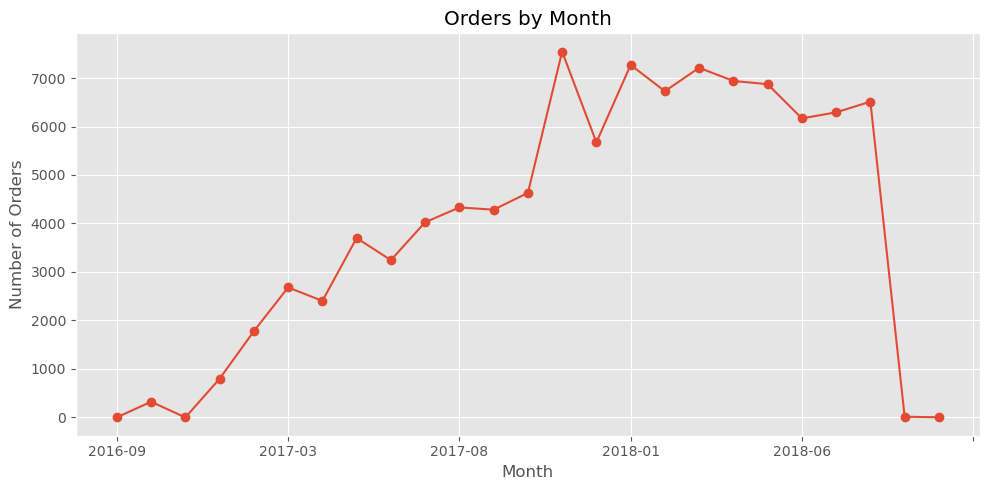

In [48]:
# 1. Trend orders per month
eda_orders["purchase_month"] = eda_orders["order_purchase_timestamp"].dt.to_period("M").astype(str)
orders_per_month = eda_orders.groupby("purchase_month")["order_id"].nunique()

plt.figure(figsize=(10,5))
orders_per_month.plot(kind="line", marker="o")
plt.title("Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

The monthly number of orders shows a strong growth trend from late 2016 until mid-2018, with a peak of around 7,500 orders per month. After that, there is a sharp drop in the last months of the dataset. This decline is not a real business effect, but rather a data coverage issue: the dataset ends in late 2018, so the last months are incomplete and should not be used for trend analysis.

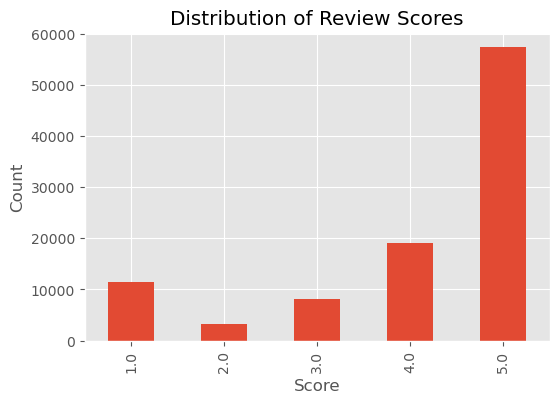

In [49]:
# 2. Distribution of review scores
plt.figure(figsize=(6,4))
eda_orders["review_score"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

The distribution of review scores is highly skewed toward positive feedback. Most customers gave the maximum score (5), while negative reviews (1) are also relatively common. Intermediate scores (2–4) occur less frequently.

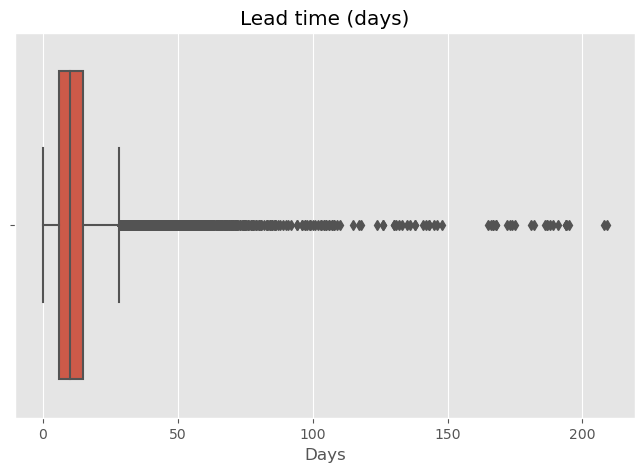

In [57]:
# 3. Lead time distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=eda_orders["lead_time_days"].dropna())
plt.title("Lead time (days)")
plt.xlabel("Days")
plt.show()

Most orders are delivered within 5–15 days, but there are many outliers with very long delivery times (up to 200+ days). These extreme cases may reflect data quality issues or exceptional delays and should be treated carefully in further analysis.

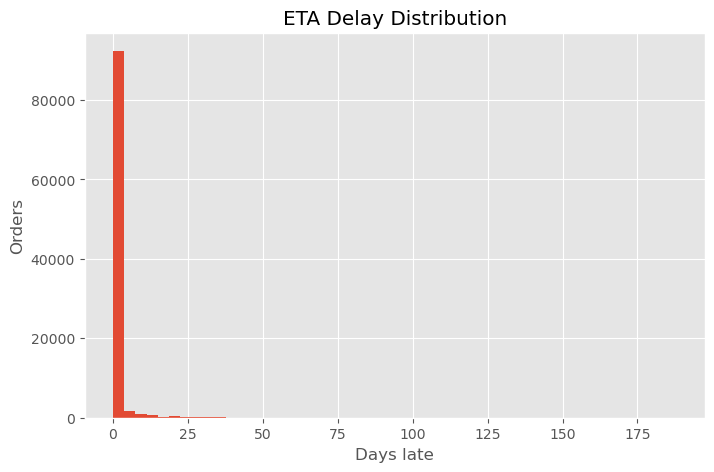

In [58]:
# 4. ETA delay distribution
plt.figure(figsize=(8,5))
plt.hist(eda_orders["eta_delay_days"].dropna(), bins=50)
plt.title("ETA Delay Distribution")
plt.xlabel("Days late")
plt.ylabel("Orders")
plt.show()

The distribution of delivery delays is extremely right-skewed. Most orders are delivered on time or with only a small delay of a few days. However, a long tail exists with delays of several weeks or even months, which represent outliers or exceptional cases.

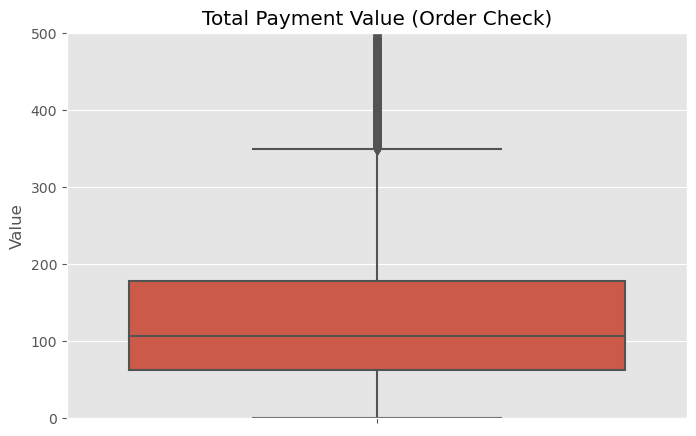

In [59]:
# 5. Payment value (check) boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y=eda_orders["total_payment_value"].dropna())
plt.ylim(0, 500)  
plt.title("Total Payment Value (Order Check)")
plt.ylabel("Value")
plt.show()

The median order payment value is slightly above 100 BRL, with most transactions between ~50 and 200 BRL.  
There are some higher-value orders (outliers above 300 BRL).

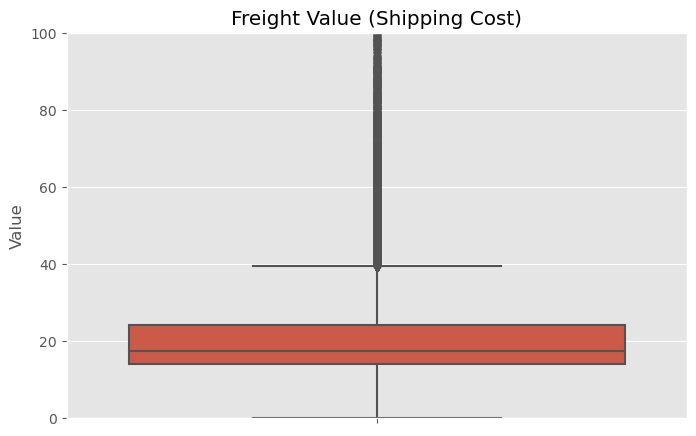

In [60]:
# 6. Freight cost distribution
plt.figure(figsize=(8,5))
sns.boxplot(y=eda_orders["freight_value"].dropna())
plt.ylim(0, 100)
plt.title("Freight Value (Shipping Cost)")
plt.ylabel("Value")
plt.show()

The distribution of shipping costs is concentrated at relatively low values. The median freight cost is around 15–20 BRL, with most orders between 10 and 30 BRL. There are some higher shipping charges (outliers above 40 BRL).

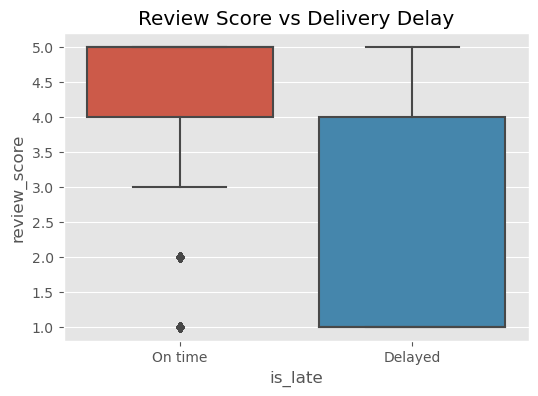

In [61]:
# 7. Review score vs delayed / on time
eda_orders["is_late"] = (eda_orders["eta_delay_days"] > 0).astype(int)
plt.figure(figsize=(6,4))
sns.boxplot(x="is_late", y="review_score", data=eda_orders)
plt.xticks([0,1], ["On time","Delayed"])
plt.title("Review Score vs Delivery Delay")
plt.show()

Customer satisfaction is strongly affected by delivery delays. Orders delivered on time typically receive very high ratings. In contrast, delayed deliveries are associated with much lower review scores, highlighting the critical impact of logistics performance on customer experience.

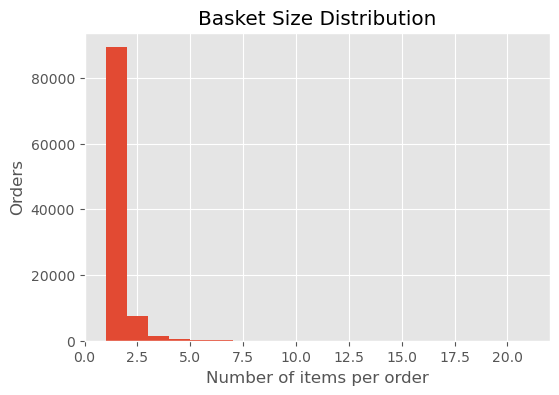

In [62]:
# 8. Basket size histogram
plt.figure(figsize=(6,4))
plt.hist(eda_orders["n_items"].dropna(), bins=20)
plt.title("Basket Size Distribution")
plt.xlabel("Number of items per order"); plt.ylabel("Orders")
plt.show()

The basket size distribution is highly skewed toward single-item orders.  
Most customers purchase only 1 product per order, while multi-item orders (2–5 items) are less frequent.  
Large baskets with more than 5 items are very rare.

# Export CLEAN CSV

In [51]:
import os
from pathlib import Path

Clean = Path("Сlean")
Clean.mkdir(exist_ok=True)

NameError: name 'Сlean' is not defined

In [62]:
orders.to_csv("Сlean/olist_orders_dataset.csv", index=False)
customers.to_csv("Сlean/olist_customers_dataset.csv", index=False)
order_items.to_csv("Сlean/olist_order_items_dataset.csv", index=False)
order_payments.to_csv("Сlean/olist_order_payments_dataset.csv", index=False)
order_reviews.to_csv("Сlean/olist_order_reviews_dataset.csv", index=False)
products_new.to_csv("Сlean/olist_products_dataset.csv", index=False)
sellers.to_csv("Сlean/olist_sellers_dataset.csv", index=False)
geolocation_clean.to_csv("Сlean/olist_geolocation_dataset.csv", index=False)